## Model training

### Set up/check environment

In [16]:
# check python environment
!conda info
# active environment should be WM_ML


     active environment : WM_ML
    active env location : /opt/anaconda3/envs/WM_ML
            shell level : 1
       user config file : /Users/jilliancheck/.condarc
 populated config files : /Users/jilliancheck/.condarc
          conda version : 24.11.3
    conda-build version : 24.5.1
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=m1
                          __conda=24.11.3=0
                          __osx=15.0=0
                          __unix=0=0
       base environment : /opt/anaconda3  (writable)
      conda av data dir : /opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /opt/anaconda3/pkgs
     

In [17]:
import numpy as np
from numpy import mean, round
import pandas as pd
import pydot
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

# set the number of maximum displayed rows for printed dataframes to 1000
pd.set_option('display.max_rows', 5000)

### CSV load in

In [18]:
# For PCA data!!!!
x_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/x_train_RTMA_PCA.csv')
y_train = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/y_train_RTMA_PCA.csv')
x_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/x_test_RTMA_PCA.csv')
y_test = pd.read_csv('/Users/jilliancheck/OneDrive - Michigan State University/Documents/Work/White mold/Modeling/jupyter notebooks/!Finalizing - 2024/Stratified data sets/y_test_RTMA_PCA.csv')

In [19]:
# Check data sets and their lengths
# Check data sets and their lengths
print('x training data, n =', len(x_train))
print('y training data, n =', len(y_train))
print('x test data, n =', len(x_test))
print('y test data, n =', len(y_test))
display(x_train)
display(y_train)
display(x_test)
display(y_test)

x training data, n = 117
y training data, n = 117
x test data, n = 30
y test data, n = 30


soil type  principal component 1  principal component 2  \
0            1              -0.403899              -0.486242   
1            1              -0.780056              -0.338330   
2            1               0.378361               0.167452   
3            1              -0.636602              -0.350494   
4            1              -0.460374              -0.126907   
5            2               0.750664              -0.371394   
6            2               0.612266              -0.385304   
7            2               0.768248              -0.211062   
8            1              -0.068666              -0.002030   
9            1               0.162834               0.069001   
10           1               0.395954              -0.058772   
11           1               0.367576               0.015358   
12           2               0.901109              -0.336100   
13           1              -0.653685              -0.205784   
14           1               0.048735              -0.091814   
15           1               0.394483               0.030877   
16           1               0.307755               0.163000   
17           1              -0.795229               0.091800   
18           1              -0.414021              -0.400494   
19           0               0.159093               0.724649   
20           1               0.248100              -0.190825   
21           2               0.150628               0.291236   
22           1               0.022349               0.296236   
23           1              -0.616605              -0.215535   
24           1               0.337590               0.116151   
25           0               0.069081               0.145040   
26           0               0.133473               0.766282   
27           2               0.801620              -0.306009   
28           1               0.025681               0.354144   
29           1               0.834153              -0.199221   
30           1              -0.473434              -0.364383   
31           1              -0.057102               0.096051   
32           1              -0.422649              -0.327409   
33           1              -0.816577               0.272649   
34           1              -0.594565              -0.427774   
35           0               0.260863               0.160033   
36           1               0.336660               0.124027   
37           1              -0.302343              -0.193569   
38           2               0.067662              -0.241558   
39           1               0.278575              -0.448979   
40           1               0.035808               0.033598   
41           1              -0.092236               0.197631   
42           1               0.010003               0.252203   
43           1              -0.030076               0.443318   
44           1              -0.214127               0.353209   
45           2              -0.038380               0.195102   
46           2              -0.741579              -0.226927   
47           1              -0.792628               0.137163   
48           2              -0.128810              -0.105653   
49           1              -0.278651              -0.394269   
50           0              -0.478746               0.754781   
51           2               0.258195               0.432847   
52           1               0.313101               0.323601   
53           1              -0.587227              -0.489932   
54           1               0.684667               0.106352   
55           1              -0.774549              -0.384978   
56           1               0.281455               0.397018   
57           1              -0.187991               0.325626   
58           1              -0.630658              -0.096485   
59           1              -0.338968               0.023042   
60           1               0.386514              -0.145066   
61           0               0.641050

target
0         0
1         0
2         1
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        1
11        1
12        0
13        1
14        1
15        0
16        0
17        1
18        1
19        0
20        0
21        1
22        0
23        1
24        1
25        0
26        0
27        0
28        1
29        0
30        1
31        1
32        0
33        1
34        1
35        1
36        1
37        0
38        0
39        0
40        1
41        0
42        1
43        1
44        1
45        1
46        0
47        1
48        0
49        1
50        1
51        1
52        1
53        0
54        0
55        0
56        1
57        1
58        1
59        0
60        1
61        0
62        1
63        1
64        1
65        1
66        0
67        1
68        1
69        0
70        1
71        0
72        1
73        1
74        1
75        0
76        1
77        0
78        0
79        1
80        1
81        1
82        0
83        1
84        0
85        1
86        1
87        0
88        1
89        1
90        0
91        1
92        1
93        0
94        1
95        1
96        1
97        0
98        0
99        0
100       0
101       0
102       0
103       1
104       0
105       1
106       1
107       0
108       1
109       1
110       1
111       1
112       1
113       0
114       1
115       0
116       1

soil type  principal component 1  principal component 2  \
0           1               0.160207               0.091252   
1           1              -0.150834               0.233089   
2           0              -0.111376               0.450026   
3           0              -0.221557               0.497032   
4           1              -0.198028               0.216832   
5           2              -0.702008               0.243081   
6           1              -0.632036              -0.389173   
7           1               0.275934               0.225723   
8           1              -0.355412               0.162348   
9           2               0.749753              -0.361045   
10          1               0.753552              -0.178817   
11          1              -0.259777              -0.554156   
12          1              -0.012049               0.371339   
13          1              -0.088294              -0.378900   
14          2              -0.194595              -0.260583   
15          1               0.636939              -0.247341   
16          1              -0.076666               0.127038   
17          1               0.688675               0.010343   
18          1               0.522322               0.060830   
19          1              -0.855511              -0.100193   
20          1              -0.863984              -0.028412   
21          1              -0.054296              -0.062461   
22          2               0.737990              -0.282299   
23          1               0.734372              -0.061513   
24          1              -0.505356              -0.093963   
25          1              -0.156707               0.282841   
26          2               0.389265              -0.249575   
27          0               0.118921               0.764519   
28          2              -0.342932              -0.231401   
29          1               0.843586              -0.279134   

    principal component 3  principal component 4  principal component 5  
0               -0.119146              -0.266501              -0.162663  
1                0.010399               0.098617               0.163652  
2                0.103415              -0.082392              -0.050818  
3               -0.038346               0.017209               0.151873  
4                0.014914               0.093948               0.136315  
5                0.488970               0.254134              -0.228213  
6               -0.226086               0.047494               0.074077  
7               -0.144426               0.236406              -0.016452  
8               -0.137239              -0.218535               0.097856  
9                0.102980               0.020853               0.049399  
10               0.284007              -0.125081              -0.016160  
11              -0.050392               0.163852               0.053768  
12               0.254889               0.196801               0.062989  
13              -0.095409               0.017996               0.140311  
14              -0.280841               0.118143              -0.316461  
15               0.066367              -0.001288              -0.012433  
16              -0.167109              -0.170062              -0.310343  
17               0.187222              -0.422947              -0.101773  
18               0.042913              -0.327359               0.009464  
19               0.630144               0.190992              -0.058755  
20               0.597645               0.071403              -0.057828  
21              -0.081313               0.145648              -0.312791  
22               0.073801               0.020064              -0.092563  
23               0.200217              -0.450778              -0.164205  
24              -0.286134              -0.412070               0.121487  
25              -0.012126               0.015729               0.164295  
26              -0.148804               0.095776    

target
0        1
1        1
2        1
3        1
4        0
5        1
6        1
7        1
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       1
16       1
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       1
25       1
26       0
27       0
28       0
29       0

In [20]:
# Define cross validation scheme
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=42)

## Alg 1: Binomial Logistic Regression
### Using with stepwise selection comparison and k_features optimization with mlxtend, and not using CV grid search
* Resource: https://rasbt.github.io/mlxtend/#examples

In [6]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Stepwise selection method and feature selection

In [7]:
# Comparing selection methods (forwards vs backwards, floating vs not) and optimizing the number of features included

lr = linear_model.LogisticRegression(random_state=42)

# Sequential Forward Selection
sfs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sfs = sfs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Selection:')
print(len(sfs.k_feature_idx_), 'features;', sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)
###################################################

# Sequential Backward Selection
sbs = SequentialFeatureSelector(lr,
          k_features=(1,6), 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=cv,
          n_jobs=-1)
sbs = sbs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Selection:')
print(len(sbs.k_feature_idx_), 'features;', sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sffs = sffs.fit(x_train, y_train.values.ravel())

print('\nSequential Forward Floating Selection:')
print(len(sffs.k_feature_idx_), 'features;', sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SequentialFeatureSelector(lr,
           k_features=(1,6), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=cv,
           n_jobs=-1)
sbfs = sbfs.fit(x_train, y_train.values.ravel())

print('\nSequential Backward Floating Selection:')
print(len(sbfs.k_feature_idx_), 'features;', sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Selection:
4 features; ('soil type', 'principal component 1', 'principal component 2', 'principal component 5')
CV Score:
0.7333333333333333


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Backward Selection:
6 features; ('soil type', 'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5')
CV Score:
0.7249999999999999


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti


Sequential Forward Floating Selection:
4 features; ('soil type', 'principal component 1', 'principal component 2', 'principal component 5')
CV Score:
0.7333333333333333

Sequential Backward Floating Selection:
4 features; ('soil type', 'principal component 1', 'principal component 2', 'principal component 5')
CV Score:
0.7333333333333333


/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selecti

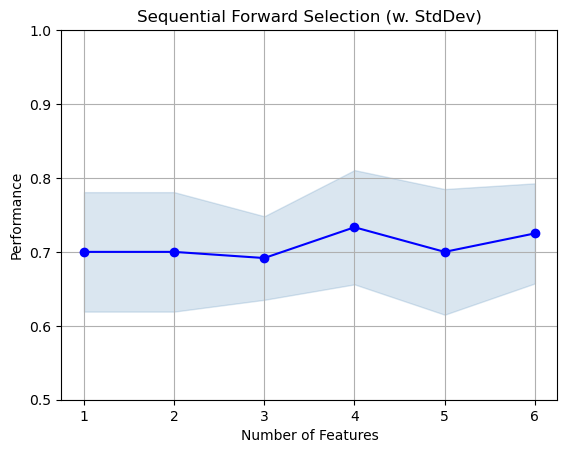

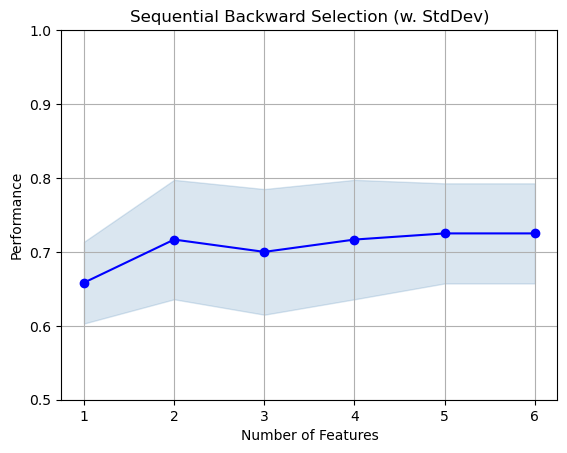

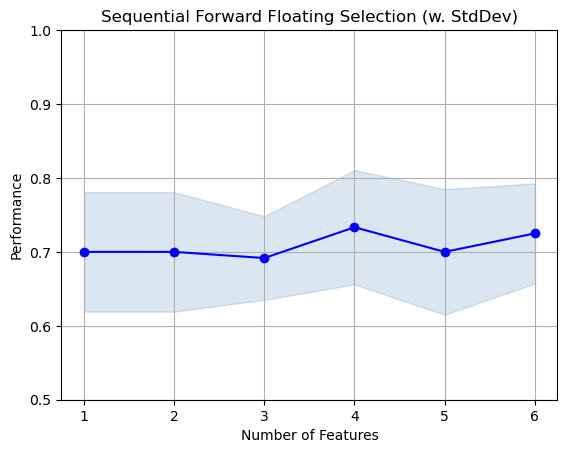

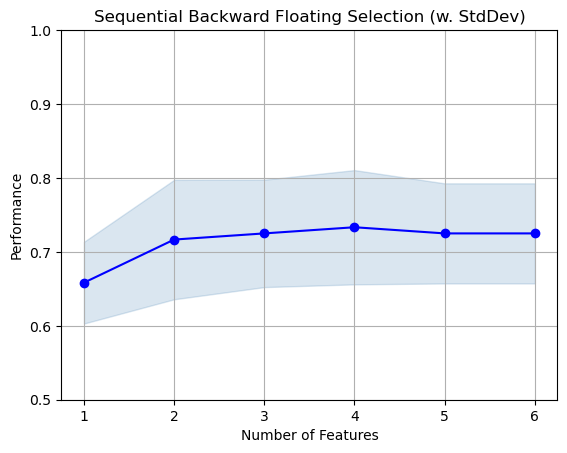

In [8]:
# Plot results 

fig_sfs = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbs = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sffs = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

fig_sbfs = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])
plt.title('Sequential Backward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

In [9]:
# Create a dataframe with only the selected features
selected_columns = list(map(str,sbfs.k_feature_names_))
x_train_selected = x_train[selected_columns]
x_test_selected = x_test[selected_columns]

### Hyper parameter grid search

In [10]:
# define parent construction
lr = linear_model.LogisticRegression(random_state=42)

# algorithm to use in optimization
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky']
# penalty technique
    # NOTE: not all solvers and penalties are compatable, so expect errors outputted during grid search
penalty = ['l1', 'l2', 'elasticnet']
# penalty strength
C = np.logspace(0, 5, 6) 
# not considering tolerance, default is 1e-4 which is fine
 
# define parameter dictionary
param_dict = {
    'solver': solver,                   
    'penalty': penalty, 
    'C': C
}

# all parameters included

In [11]:
# execute grid search
grid = GridSearchCV(estimator = lr,
                    param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv,
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train_selected, y_train.values.ravel())

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=1.0, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....C=1.0, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, penalty=l1, solver=liblinear;, score=0.667 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l1, solver=liblin

/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/WM_ML/lib/python3.12/site-packages/sklearn/linear_mod

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', 'newton-cholesky']},
             verbose=3)

In [12]:
# organize grid search results for further exploration
lr_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(lr_grid_results)

C     penalty           solver  Accuracy
56     1000.0          l1        liblinear  0.741667
80    10000.0          l2        liblinear  0.741667
61     1000.0          l2            lbfgs  0.741667
62     1000.0          l2        liblinear  0.741667
63     1000.0          l2              sag  0.741667
64     1000.0          l2             saga  0.741667
65     1000.0          l2  newton-cholesky  0.741667
74    10000.0          l1        liblinear  0.741667
76    10000.0          l1             saga  0.741667
78    10000.0          l2        newton-cg  0.741667
79    10000.0          l2            lbfgs  0.741667
81    10000.0          l2              sag  0.741667
58     1000.0          l1             saga  0.741667
82    10000.0          l2             saga  0.741667
83    10000.0          l2  newton-cholesky  0.741667
92   100000.0          l1        liblinear  0.741667
94   100000.0          l1             saga  0.741667
96   100000.0          l2        newton-cg  0.741667
97   100000.0          l2            lbfgs  0.741667
98   100000.0          l2        liblinear  0.741667
99   100000.0          l2              sag  0.741667
100  100000.0          l2             saga  0.741667
60     1000.0          l2        newton-cg  0.741667
101  100000.0          l2  newton-cholesky  0.741667
46      100.0          l2             saga  0.741667
45      100.0          l2              sag  0.741667
44      100.0          l2        liblinear  0.741667
43      100.0          l2            lbfgs  0.741667
42      100.0          l2        newton-cg  0.741667
40      100.0          l1             saga  0.741667
38      100.0          l1        liblinear  0.741667
47      100.0          l2  newton-cholesky  0.741667
6         1.0          l2        newton-cg  0.733333
7         1.0          l2            lbfgs  0.733333
9         1.0          l2              sag  0.733333
10        1.0          l2             saga  0.733333
11        1.0          l2  newton-cholesky  0.733333
22       10.0          l1             saga  0.733333
4         1.0          l1             saga  0.725000
20       10.0          l1        liblinear  0.725000
2         1.0          l1        liblinear  0.725000
24       10.0          l2        newton-cg  0.725000
27       10.0          l2              sag  0.725000
28       10.0          l2             saga  0.725000
29       10.0          l2  newton-cholesky  0.725000
25       10.0          l2            lbfgs  0.716667
26       10.0          l2        liblinear  0.716667
8         1.0          l2        liblinear  0.708333
0         1.0          l1        newton-cg       NaN
1         1.0          l1            lbfgs       NaN
3         1.0          l1              sag       NaN
5         1.0          l1  newton-cholesky       NaN
12        1.0  elasticnet        newton-cg       NaN
13        1.0  elasticnet            lbfgs       NaN
14        1.0  elasticnet        liblinear       NaN
15        1.0  elasticnet              sag       NaN
16        1.0  elasticnet             saga       NaN
17        1.0  elasticnet  newton-cholesky       NaN
18       10.0          l1        newton-cg       NaN
19       10.0          l1            lbfgs       NaN
21       10.0          l1              sag       NaN
23       10.0          l1  newton-cholesky       NaN
30       10.0  elasticnet        newton-cg       NaN
31       10.0  elasticnet            lbfgs       NaN
32       10.0  elasticnet        liblinear       NaN
33       10.0  elasticnet              sag       NaN
34       10.0  elasticnet             saga       NaN
35       10.0  elasticnet  newton-cholesky       NaN
36      100.0          l1        newton-cg       NaN
37      100.0          l1            lbfgs       NaN
39      100.0          l1              sag       NaN
41      100.0          l1  newton-cholesky       NaN
48      100.0  elasticnet        newton-cg       NaN
49      100.0  elasticnet            lbfgs       NaN
50      100.0  elasticnet        libl

### Hyper parameter and model setting

In [13]:
# indexing best parameters from GridSearchCV
hyper_lr = grid.best_params_

# print best hyperparamaters
print(hyper_lr)

# tune logistic regression model using best hyper parameters
lr_tuned = linear_model.LogisticRegression(random_state=42,
                                           solver = hyper_lr['solver'],
                                           penalty = hyper_lr['penalty'],
                                           C = hyper_lr['C'])

{'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}


### Performance estimation for training data

In [14]:
# evaluate the tuned model
lr_tuned_train_result = cross_val_score(lr_tuned,
                                    x_train_selected,
                                    y_train.values.ravel(),
                                    cv=cv)

# display the tuned model accurary as a percentage
# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(lr_tuned_train_result,2))
print('Average accuracy on training data:', lr_tuned_train_result.mean())

Accuracy scores: [0.67 0.67 0.79 0.79 0.79]
Average accuracy on training data: 0.7416666666666666


### Evalutate model with test data

In [15]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict(x_test_selected)
yprob = lr_tuned.fit(x_train_selected, y_train.values.ravel()).predict_proba(x_test_selected)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.71
Tuned model accuracy on testing data: 0.7
Sensitivity 0.64
Specficity 0.75
Precision 0.69


### Print coefficients

In [ ]:
list1 = x_train_selected.columns.tolist()
list2 = lr_tuned.coef_.ravel().tolist()

coefs = pd.DataFrame({'feature': list1, 'coefficient': list2})

display(coefs)

## Alg 2: Decision Tree

In [ ]:
# packages import
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn import tree

### Hyper parameter grid search

In [ ]:
# define parent construction
dt = DecisionTreeClassifier(random_state=42)

# function to  measure the quality of a split. 'gini' = gini impurity, 'log_loss' and 'entropy' 
    # both for the Shannon information gain
criterion = ['gini', 'entropy', 'log_loss']
# splitter: strategy used to choose the split at each node
splitter = ['best']
# maximum depth of decision tree
max_depth = range(7,13)
# minimum number of samples required to split an internal node
min_samples_split = range(3,10)
# minimum number of samples required to be a leaf node
min_samples_leaf = range(3,5)

    
# define parameter dictionary
param_dict = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth':max_depth, 
    'min_samples_split':min_samples_split, 
    'min_samples_leaf':min_samples_leaf,
}

# parameters not included in GridSearchCV:
    # min_weight_fraction: minimum weighted fraction of the sum total of weights (of all the input samples) required
        # to be a leaf node. Samples have equal weight when sample_weight is not provided.
    # max_features: the number of features to consider when looking for the best split (default = None)
    # max_leaf_nodes: grow a tree with max leaf nodes in best-first fashion. If none, then unlimited number of leaf nodes
    # min_impurity_decrease: a node will be split if this split induces a decrease of the impurity greater than or equal
        # to this value (default = 0.0)
    # class weight: weights associated with class lables. If none, all classes are supposed to have weight one
    # ccp alpha: complexity parameter used for minimal cost-complexity pruning

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = dt,
                   param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv, 
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
dt_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(dt_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_dt = grid.best_params_

# print best hyperparamaters
print(hyper_dt)

# tune decision tree model using best hyper parameters
dt_tuned = DecisionTreeClassifier(random_state=42,
                                  criterion = hyper_dt['criterion'],
                                  splitter = hyper_dt['splitter'],
                                 max_depth = hyper_dt['max_depth'],
                                 min_samples_leaf= hyper_dt['min_samples_leaf'],
                                 min_samples_split= hyper_dt['min_samples_split']
                                 )

### Performance estimation for training data

In [ ]:
# evaluate the tuned model
dt_tuned_train_result  = cross_val_score(dt_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(dt_tuned_train_result , 2))
print('Average accuracy on training data:', dt_tuned_train_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = dt_tuned.fit(x_train, y_train).predict(x_test)
yprob = dt_tuned.fit(x_train, y_train).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

### Tree visualization

In [ ]:
'''
# flow chart visualization of decision tree 

feature_names = x_train.columns[0:]

dot_data = tree.export_graphviz(dt_tuned,
                    feature_names = feature_names,
                    class_names = True,
                    filled = True)

graph = graphviz.Source(dot_data, format = 'png')
graph
'''

### Extract feature importance

In [ ]:
# Get the feature importances from the fitted model
importances = dt_tuned.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Alg 3: Random Forest

In [21]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

### Hyper parameter grid search

In [30]:
# define parent construction
rf = RandomForestClassifier(random_state=42)

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=20, stop=30, num=10)]
# function to measure quality of split
criterion = ['entropy', 'log_loss', 'gini']
# number of features to consider at every split
#max_features = ['log2']
# maximum number of levels in tree
max_depth = range(7, 11)
# minimum number of samples required to split a node
min_samples_split = range(5,10)
# minimum number of samples required at each leaf node
min_samples_leaf = range(3,5)
# whether bootstrap samples are used when building trees (Default = True)
#bootstrap = [True]
ccp_alpha = (0, 0.001, 0.01)

# define parameter dictionary
param_dict = {'n_estimators': n_estimators,
              'criterion': criterion,
               #'max_featuTRres': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'ccp_alpha': ccp_alpha
               #'bootstrap': bootstrap
             }    

# parameters not included in GridSearchCV:
# min_weight_fraction: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
# max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
# oob_score: Whether to use out-of-bag samples to estimate the generalization score. By default, accuracy_score is used.
# class_weight
# ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning
# max_samples: If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [31]:
grid = GridSearchCV(estimator=rf,
                    param_grid=param_dict,
                    cv=cv,
                    verbose=3)
grid.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.625 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.583 total time=   0.0s
[CV 3/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.708 total time=   0.0s
[CV 4/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.583 total time=   0.0s
[CV 5/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=20;, score=0.792 total time=   0.0s
[CV 1/5] END ccp_alpha=0, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=21;, score=0.667 total time=   0.0s
[CV 2/5] END ccp_alpha=0, criterion=entropy, m

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': (0, 0.001, 0.01),
                         'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': range(7, 11),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(5, 10),
                         'n_estimators': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                          30]},
             verbose=3)

In [32]:
# organize grid search results for further exploration
rf_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(rf_grid_results)

ccp_alpha criterion  max_depth  min_samples_leaf  min_samples_split  \
2417      0.010   entropy          7                 3                  6   
40        0.000   entropy          7                 3                  9   
140       0.000   entropy          8                 3                  9   
3441      0.010      gini          9                 3                  9   
240       0.000   entropy          9                 3                  9   
340       0.000   entropy         10                 3                  9   
3241      0.010      gini          7                 3                  9   
407       0.000  log_loss          7                 3                  5   
417       0.000  log_loss          7                 3                  6   
440       0.000  log_loss          7                 3                  9   
540       0.000  log_loss          8                 3                  9   
2817      0.010  log_loss          7                 3                  6   
640       0.000  log_loss          9                 3                  9   
2807      0.010  log_loss          7                 3                  5   
740       0.000  log_loss         10                 3                  9   
2407      0.010   entropy          7                 3                  5   
1207      0.001   entropy          7                 3                  5   
1217      0.001   entropy          7                 3                  6   
1240      0.001   entropy          7                 3                  9   
1340      0.001   entropy          8                 3                  9   
1440      0.001   entropy          9                 3                  9   
1940      0.001  log_loss         10                 3                  9   
1840      0.001  log_loss          9                 3                  9   
1540      0.001   entropy         10                 3                  9   
1740      0.001  log_loss          8                 3                  9   
1607      0.001  log_loss          7                 3                  5   
1617      0.001  log_loss          7                 3                  6   
3541      0.010      gini         10                 3                  9   
1640      0.001  log_loss          7                 3                  9   
17        0.000   entropy          7                 3                  6   
7         0.000   entropy          7                 3                  5   
1800      0.001  log_loss          9                 3                  5   
414       0.000  log_loss          7                 3                  6   
2244      0.001      gini          9                 3                  9   
3120      0.010  log_loss         10                 3                  7   
2241      0.001      gini          9                 3                  9   
2240      0.001      gini          9                 3                  9   
3127      0.010  log_loss         10                 3                  7   
3128      0.010  log_loss         10                 3                  7   
3129      0.010  log_loss         10                 3                  7   
1168      0.000      gini         10                 4                  6   
2234      0.001      gini          9                 3                  8   
3140      0.010  log_loss         10                 3                  9   
3141      0.010  log_loss         10                 3                  9   
1178      0.000      gini         10                 4                  7   
3143      0.010  log_loss         10                 3                  9   
2225      0.001      gini          9                 3                  7   
1188      0.000      gini         10                 4                  8   
443       0.000  log_loss          7                 3                  9   
441       0.000  log_loss          7                 3                  9   
1204      0.001   entropy          7                 3                  5   
42

### Hyper parameter and model setting

In [33]:
# indexing best parameters from GridSearchCV
hyper_rf = grid.best_params_

# print best hyperparamaters
print(hyper_rf)

# tune decision tree model using best hyper parameters
rf_tuned = RandomForestClassifier(random_state=42,
    n_estimators = hyper_rf["n_estimators"],
    min_samples_split = hyper_rf["min_samples_split"],
    min_samples_leaf = hyper_rf["min_samples_leaf"],
    #max_features = hyper_rf["max_features"],
    max_depth = hyper_rf["max_depth"]
    #bootstrap = hyper_rf["bootstrap"]
                                 )

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 27}


### Performance estimation for training data

In [34]:
# evaluate the tuned model
rf_tuned_train_result = cross_val_score(rf_tuned,
                                        x_train,
                                        y_train.values.ravel(),
                                        cv=cv)

# display the tuned model accurary as a percentage
print('Accuracy scores:', np.round(rf_tuned_train_result,2))
print('Average accuracy on training data:', rf_tuned_train_result.mean())

Accuracy scores: [0.62 0.54 0.71 0.71 0.75]
Average accuracy on training data: 0.6666666666666667


### Evaluate model with test data

In [35]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = rf_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = rf_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

AUROC 0.77
Tuned model accuracy on testing data: 0.77
Sensitivity 0.71
Specficity 0.81
Precision 0.77


### Extract feature importance

In [ ]:
# Get the feature importances from the fitted model
importances = rf_tuned.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Alg 4: Support Vector Machine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Hyperparameter grid search

In [ ]:
# define the parent construction
svm = SVC(random_state=42)

# C: regularization penalty
C = [0.1, 1, 10]
# kernel: Specifies the kernel type to be used in the algorithm
kernel = ['linear', 'rbf', 'poly']
# gamma: kernel coefficient
gamma = ['scale', 'auto']
# degree: degree of the polynomial kernel function
degree = [1, 2, 3, 4, 5]

decision_function_shape = ['ovo', 'ovr']

# define parameter dictionary
param_dict = {
    'C': C,
    'kernel': kernel,
    'gamma': gamma,
    'degree': degree,
    'decision_function_shape': decision_function_shape
}

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = svm,
                    param_grid = param_dict, # mapping parameter dictionary defined earlier
                    cv = cv, 
                    verbose = 3 # option 3 outputs scores for each test
                   )
grid.fit(x_train, y_train.values.ravel())

In [ ]:
# organize grid search results for further exploration
svm_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(svm_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_params = grid.best_params_

# print best hyperparamaters
print("Best Hyperparameters:", hyper_params)

# tune model using best hyper parameters
svm_tuned = SVC(random_state=42,
                C = hyper_params['C'],
                kernel = hyper_params['kernel'],
                gamma = hyper_params['gamma'],
                degree = hyper_params['degree'],
               probability = True)

### Performance estimation for training data

In [ ]:
# evaluate the tuned model
tuned_model_result = cross_val_score(svm_tuned,
                                    x_train,
                                    y_train.values.ravel(),
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Tuned model accuracy on training data:', tuned_model_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = svm_tuned.fit(x_train, y_train.values.ravel()).predict(x_test)
yprob = svm_tuned.fit(x_train, y_train.values.ravel()).predict_proba(x_test)

# assessing sensitivity/specificity/precision of tuned model on test data
cm = confusion_matrix(y_test, ypred)
tp = cm[0, 0]
fp = cm[0, 1]
tn = cm[1, 1]
fn = cm[1, 0]

# assessing auroc of tuned model
auroc = roc_auc_score(y_test, yprob[:,1])

# print results
print('AUROC', np.round(auroc, 2))
print('Tuned model accuracy on testing data:', np.round((tp+tn)/(tp+tn+fp+fn), 2))
print('Sensitivity', np.round(tp/(tp+fn), 2))
print('Specficity', np.round(tn/(tn+fp), 2))
print('Precision', np.round(tp/(tp+fp), 2))

## Alg 5: Single-Layer Neural Network

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

y_train = np.ravel(y_train) # target data must be a 1-D array, not a single column vector

### Hyper parameter grid search

In [ ]:
# define the parent construction
mlp = MLPClassifier(random_state=42, max_iter=10000)

# definition
hidden_layer_sizes = [10, 15, 20, 30]
# definition
activation = ['logistic', 'tanh', 'relu']
# definition
alpha = [0.0001, 0.001, 0.01]
         
# define parameter dictionary
param_dict = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation,
    'alpha': alpha
}

# parameters not included in GridSearchCV:
    # ...

In [ ]:
# execute grid search
grid = GridSearchCV(estimator = mlp, 
                           param_grid = param_dict, 
                           cv=2, 
                           verbose = 3)
grid.fit(x_train, y_train)

In [ ]:
# organize grid search results for further exploration
mlp_grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy', ascending = False)
display(mlp_grid_results)

### Hyper parameter and model setting

In [ ]:
# indexing best parameters from GridSearchCV
hyper_mlp = grid.best_params_

# print best hyperparamaters
print(hyper_mlp)

# tune model using best hyper parameters
mlp_tuned = MLPClassifier(random_state=42,
                          hidden_layer_sizes = hyper_mlp['hidden_layer_sizes'],
                          activation = hyper_mlp['activation'],
                          alpha = hyper_mlp['alpha'])

### Performance estimation for training data

In [ ]:
# define the cross validation method - 5 cross validations with 80/20 split

# evaluate the tuned model
tuned_model_result = cross_val_score(mlp_tuned,
                                    x_train,
                                    y_train,
                                    cv=cv)

# display the tuned model accurary as a percentage
print('Tuned model accuracy on training data:', tuned_model_result.mean())

### Evaluate model with test data

In [ ]:
# using tuned model to make y test data preditinos using x test data inputs
ypred = mlp_tuned.fit(x_train, y_train).predict(x_test)

# assessing accuracy of tuned model on test data
mlp_tuned_score = mlp_tuned.score(x_test, y_test)

# print results
print('Tuned model accuracy on testing data:', dt_tuned_score)
print('Sensitivity', tp/(tp+fn))
print('Specficity', tn/(tn+fp))
print('Precision', tp/(tp+fp))
print('AUROC', auroc)

### Extract feature importance
* is this reliable? https://datascience.stackexchange.com/questions/44700/how-do-i-get-the-feature-importace-for-a-mlpclassifier

In [ ]:
# Get the feature importances from the fitted model
importances = mlp_tuned.coefs_[0]

feature_names = x_train.columns[0:]

feature_importances = []

# Print the feature importances
for i, feature_name in enumerate(feature_names):
    feature_importance = importances[:, i].sum()
    feature_importances.append(feature_importance)

feature_importance_results = pd.DataFrame({'feature name': feature_names})
feature_importance_results = pd.DataFrame({'importance': feature_importances}).sort_values('feature_importances', ascending = True)

display(feature_importance_results)

In [ ]:
display(feature_names)

In [ ]:
display(feature_importances)

In [ ]:
# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Pickle files

In [ ]:
import pickle

In [ ]:
# Pickle models

pickle.dump(lr_tuned, open('Models/LR_PCA_RTMA.pkl','wb'))
pickle.dump(dt_tuned, open('Models/DT_PCA_RTMA.pkl','wb'))
pickle.dump(rf_tuned, open('Models/RF_PCA_RTMA.pkl','wb'))
pickle.dump(svm_tuned, open('Models/SVM_PCA_RTMA.pkl','wb'))